#Project 2
In this project, you will develop a numerical model for projectile motion with atmospheric drag on the Earth, Moon, Mars, and Venus.  You want to launch a probe from a lander on the Moon, Mars, and Venus.  But, the development and testing occurs here on Earth. NASA requires that the probe land at least 20 km from the lander and thus you must optimize the launch velocity and angle to meet this requirement.  Completion of the project will consist of a 2000 word paper/report (using the RevTex style template on Overleaf) containing the following:

- Abstract summary (~200 words)
- Introduction -- Summarize some background information concerning projectile motion
- Methods -- Explain where the theoretical model comes from, how the addition of drag alters the equations, and the numerical method/code used to produce your results
- Results -- Show the results of your numerical modeling and discuss how your results compare to analytical  values
Conclusions --  Summarize your study (what did you do? and what did you find?); - Identify potential branching points for your work (i.e., what new questions could be addressed in the future?)
- References -- Cite appropriate references within your paper and provide a list of references at the end.
- Figures and Tables -- Illustrate the goal of the model and how well your theoretical model fits the data.  Include a table showing your final results. You can include additional figures to help explain the methods, but you need to limit the total number of figures and tables to five.
Some background material is available within the course GitHub repository, but you should also look on the internet to find additional material.
http://farside.ph.utexas.edu/teaching/336k/Newtonhtml/node29.html

Some important equations:
- Terminal Velocity: $v_t = \frac{mg}{c}$ where c is a positive constant (Note: this is for an object moving vertically downward).
- Projectile motion equation: $m \frac{dv}{dt} = mg - cv$ where m is the mass of the object, g is the gravitational constant, c is a positive constant, and v is the initial velocity.
- Drag: $D = \frac{\rho C A}{2}$ where $\rho$ is the density of air, A is the sillouette of the object, and C is the dimensionless quantity called the drag coefficient (depends on the shape of the object).
-

Some important things to remember
- Moon air density: $0$
- Mars air density: $0.020 kg/m^3$
- Venus air density: $65 kg/m^{-3}$
- Earth air density: $1.293 kg/m^{-3}$
- Drag Coefficients:
  - Sphere: 0.47
  - Streamlined Body: 0.04
  - Cone: 0.50
- Equation of projectile motion with air resistance
  - An object moving in an atmo is acted on by 2 forces
    - Gravity: $F_G = -mgŷ$
    - Air Resistance: $F_R = -\frac{1}{2}c\rho Avv̂$, where $\rho$ is the air density, c is the drag coefficient, and A is the cross sectional area.
    - lets say the radius of our projectile is $0.05$, then A is $A = π(0.05)^2 = 0.00785398$.
- The relevant equations of motion
  - $mẍ = -\frac{1}{2}c\rho A \sqrt{ẋ^2 + ẏ^2} ẋ$
  - $mÿ = -\frac{1}{2}c\rho A\sqrt{ẋ^2 + ẏ^2} ẏ - mg$
- Acceleration Equation
  - $g = \frac{Gm}{r^2}$
    - $m_{earth} = 5.972 × 10^{24}$
    - $r_{earth} = 6378.1$
    - $m_{moon} = 7.347 × 10^{22}$ kg
    - $r_{moon} = 1740$
    - $m_{mars} = 6.39 × 10^{23}$
    - $r_{mars} = 3390.1$
    - $m_{venus} = 4.867 × 10^{24}$
    - $r_{venus} = 6052$

Acceleration due to gravity on Moon is -1.6196
Acceleration due to gravity on Mars is -3.7109
Acceleration due to gravity on Earth is -9.7981
Acceleration due to gravity on Venus is -8.8689
The air resistance on Moon -0.00000
The air resistance on Mars is -0.00001
The air resistance on Earth is -0.00095
The air resistance on Venus is -0.04799


(0.0, 20050.0)

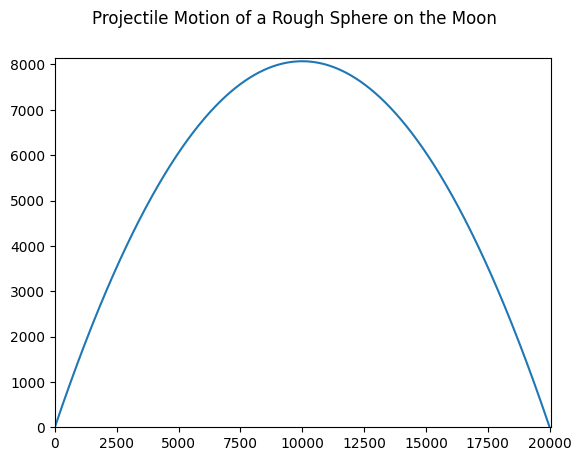

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G,pi

def rk4(y,t,h,derivs):
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

#Air densities on other bodies
rho_moon = 0
rho_mars = 0.02
rho_earth = 1.293
rho_venus = 65

#Drag variables for rough sphere
Drag_coefficient_s = 0.47
c = Drag_coefficient_s
r = 0.1
A = pi*r**2
m = 10

target_distance = 20000
x_i = 0 #initial x value
y_i = 0 #initial y value

#Acceleration due to gravity equation
def accel(m,r):
  return ((G*m)/(r**2))/-1000000 #G:graviatation constant, m:mass, r:radius
#Air resistance equation
def air_resistance(rho):
  return ((-0.5)*c*rho*A)/m

#finding the gravity constants
accel_moon = accel(7.347e22,1740)
accel_mars = accel((6.39*10**(23)),3390.1)
accel_earth = accel((5.972*10**(24)),6378.1)
accel_venus = accel((4.867*10**(24)),6052)

print(f'Acceleration due to gravity on Moon is {accel_moon:.4f}')
print(f'Acceleration due to gravity on Mars is {accel_mars:.4f}')
print(f'Acceleration due to gravity on Earth is {accel_earth:.4f}')
print(f'Acceleration due to gravity on Venus is {accel_venus:.4f}')

#solving the air resistance equation for each body
air_res_moon = air_resistance(rho_moon)
air_res_mars = air_resistance(rho_mars)
air_res_earth = air_resistance(rho_earth)
air_res_venus = air_resistance(rho_venus)

print(f'The air resistance on Moon {air_res_moon:.5f}')
print(f'The air resistance on Mars is {air_res_mars:.5f}')
print(f'The air resistance on Earth is {air_res_earth:.5f}')
print(f'The air resistance on Venus is {air_res_venus:.5f}')

theta_0 = np.degrees(35) #launch angle
v_0 = 190.21 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp =np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_moon*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_moon + air_res_moon*vmag*u[3]
  return yp

dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

f = open("Project_2_data_moon.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    states = states[:i,:]
    break
f.close()

x,y = np.genfromtxt("Project_2_data_moon.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
ax=fig.add_subplot(111)
fig.suptitle('Projectile Motion of a Rough Sphere on the Moon')
ax.plot(x,y)
ax.set_ylim(0,8150)
ax.set_xlim(0,20050)

#Note: max height = 8071.542543492146
#

In [ ]:
m = 150
c = 0.04
r = 0.02
A = pi*r**2

def air_resistance(rho):
  return ((-0.5)*c*rho*A)/m
x = air_resistance(rho_earth)

print(f'lol {x:.6f}')

lol -0.000000


(0.0, 20050.0)

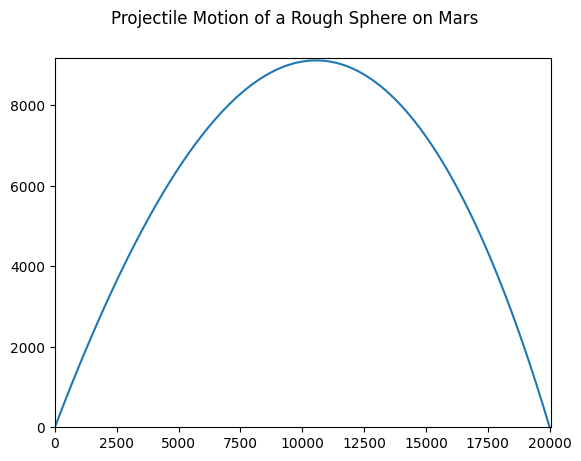

In [ ]:
#for mars

theta_0 = np.degrees(35) #launch angle
v_0 = 334.72 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

air_res = air_res_mars

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp =np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_mars*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_mars + air_res_mars*vmag*u[3]
  return yp

dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

f = open("Project_2_data_mars.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

x,y = np.genfromtxt("Project_2_data_mars.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
ax=fig.add_subplot(111)
fig.suptitle('Projectile Motion of a Rough Sphere on Mars')
ax.plot(x,y)
ax.set_ylim(0,9185)
ax.set_xlim(0,20050)

#Note: max height = 9117.44338591937


(0.0, 50000.0)

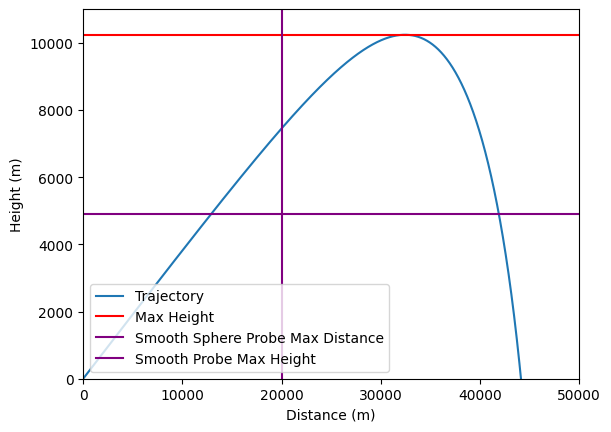

In [ ]:
#for earth
'''
This will have to be a bit different as the launch velocity would have to be
rediculous.

I changed to a smooth sphere which has a drag coefficient of 0.1

Talk about how this is an insane speed and that I will use a different projectile
for the Earth simulations
'''

#Drag variables for smooth sphere
Drag_coefficient_ss = 0.04
c_new = Drag_coefficient_ss
r = 0.1
A = pi*r**2
m_new = 10

def air_resistance_earth(rho):
  return ((-0.5)*c_new*rho*A)/m_new

air_res_earth = air_resistance_earth(rho_earth)

theta_0 = np.radians(21) #launch angle
v_0 = 6710 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp = np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_earth*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_earth + air_res_earth*vmag*u[3]
  return yp

dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

f = open("Project_2_data_earthv1.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

x,y = np.genfromtxt("Project_2_data_earthv1.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
ax=fig.add_subplot(111)
#fig.suptitle('Projectile Motion of a Smooth Sphere on Earth')
ax.plot(x,y)
plt.axhline(y = 10237.056742553354, color = 'r', label = 'Max Height')
plt.axvline(x=20000, color = 'purple', label = 'Smooth Probe max distance')
plt.axhline(y = 4892.2369,color = 'purple', label = 'Smooth Sphere Probe Max Height')
plt.legend(['Trajectory','Max Height', 'Smooth Sphere Probe Max Distance', 'Smooth Probe Max Height'], loc = 3)
ax.set_ylabel('Height (m)')
ax.set_xlabel('Distance (m)')

ax.set_ylim(0,11000)
ax.set_xlim(0,50000)
#plt.axvline(x = 9999.4194, color = 'r', label = 'Maximum height')
#plt.legend(['Trajectory', 'Max Height'], loc = 6, fontsize = 8)
#Note: max height = 4892.236882623538 at 15079.181155806893

(0.0, 20050.0)

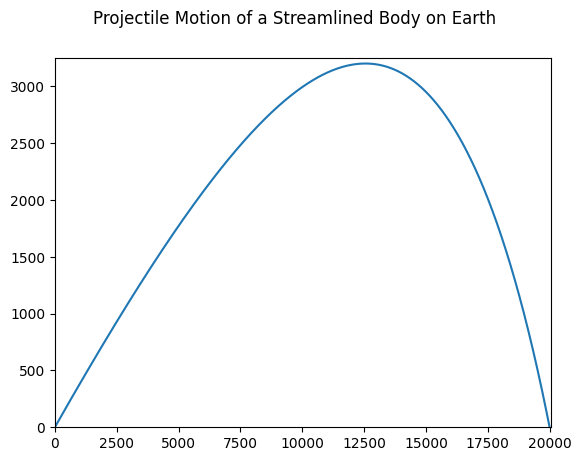

In [ ]:
#for Earth v2 (w/ better projectile)
'''
This time, we will use a streamlined projectile of drag coefficient 0.04
'''
#Drag variables for smooth sphere
Drag_coefficient_ss = 0.04
c_new = Drag_coefficient_ss
r = 0.1
A = pi*r**2
m_new = 10

def air_resistance_earth(rho):
  return ((-0.5)*c_new*rho*A)/m_new

air_res_earth = air_resistance_earth(rho_earth)

theta_0 = np.radians(21) #launch angle
v_0 = 1133.3 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp = np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_earth*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_earth + air_res_earth*vmag*u[3]
  return yp

dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

f = open("Project_2_data_earthv2.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

x,y = np.genfromtxt("Project_2_data_earthv2.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
ax=fig.add_subplot(111)
fig.suptitle('Projectile Motion of a Streamlined Body on Earth')
ax.plot(x,y)
ax.set_ylim(0,3250)
ax.set_xlim(0,20050)

#Note: max height = 3198.605385422074


(0.0, 20050.0)

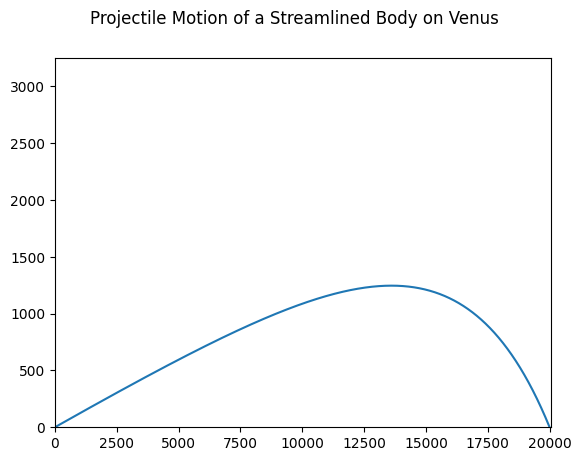

In [ ]:
#for Venus (w/ better projectile)
'''
This time, we will use a streamlined projectile of drag coefficient 0.04
'''

#Drag variables for streamlined body
Drag_coefficient_ss = 0.04
c_new = Drag_coefficient_ss
r = 0.02
A = pi*r**2
m = 150 #changed from 10

air_res_venus = air_resistance(rho_venus)

theta_0 = np.radians(7) #launch angle
v_0 = 3028.5 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp = np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_venus*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_venus + air_res_venus*vmag*u[3]
  return yp

dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

f = open("Project_2_data_venus.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

x,y = np.genfromtxt("Project_2_data_venus.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
ax=fig.add_subplot(111)
fig.suptitle('Projectile Motion of a Streamlined Body on Venus')
ax.plot(x,y)
ax.set_ylim(0,3250)
ax.set_xlim(0,20050)

# Max Y value; 1246.7257017433444


So now, the probe (in order to fly on all 4 planets) has to be a streamlined body, of drag coefficient 0.04, a radius of 0.02 meters, and a mass of 150 kgs. Lets use this probe for the 3 other planets and see how the velocity changes for each

The air resistance on the Moon is -0.00000
Acceleration due to gravity on Moon is -1.61964
The velocity to fire the probe on the Moon is 179.983 m/s
The max height of this projectile on the Moon is 8071.5449
----------------------------------------------------------------
The air resistance on Mars is -0.00000
Acceleration due to gravity on Mars is -3.71092
The velocity to fire the probe on Mars is 272.447 m/s
The max height of the projectile on Mars is 8071.3825
----------------------------------------------------------------
The air resistance on Earth is -0.00000
Acceleration due to gravity on Earth is -9.79812
The velocity to fire the probe on Earth is 542.031 m/s
The max height of the projectile on Earth is 1922.5529
----------------------------------------------------------------
The air resistance on Venus is -0.00013
Acceleration due to gravity on Venus is -8.86889
The velocity to fire the probe on Venus is 3028.5 m/s
The max height of the projectile on Venus is 1245.7256
-----

<ipython-input-21-f208de610cca>:220: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(221)


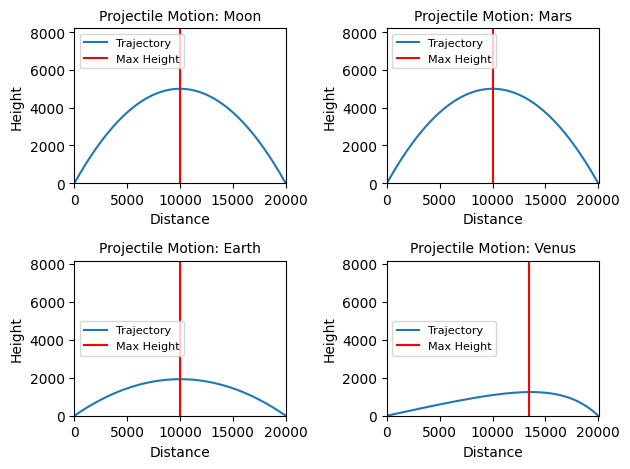

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import G,pi

def rk4(y,t,h,derivs): #using rk4 method for solving the DE's of motions
    #function to implement rk4
    #y = [x,v] current state
    #t = current time
    #h = time step
    #derivs = derivative function that defines the problem
    k1,k2,k3,k4 = np.zeros(2),np.zeros(2),np.zeros(2),np.zeros(2)
    k1 = h*derivs(y,t)
    y_halfstep = y + k1/2. #Euler half step using k1
    k2 = h*derivs(y_halfstep,t+h/2)
    y_halfstep = y + k2/2. #Euler half step using k2
    k3 = h*derivs(y_halfstep,t+h/2)
    k4 = h*derivs(y + k3,t+h) #full step using k3
    y_next = y + (k1+2*k2+2*k3+k4)/6.
    return y_next

def accel(m,r): #acceleration due ot gravity on each body
  return ((G*m)/(r**2))/-1000000 #G:graviatation constant, m:mass, r:radius

#finding the gravity constants
accel_moon = accel((7.347*10**(22)),1740)
accel_mars = accel((6.39*10**(23)),3390.1)
accel_earth = accel((5.972*10**(24)),6378.1)
accel_venus = accel((4.867*10**(24)),6052)

#Air densities on other bodies
rho_moon = 0
rho_mars = 0.02
rho_earth = 1.293
rho_venus = 65

#Drag variables for streamlined body
Drag_coefficient_ss = 0.04
c_new = Drag_coefficient_ss
r = 0.02 #radius of the probe
A = pi*r**2 #sillouete of the probe
m_new = 150 #mass of the probe

#Amount of each time step given the total time of flight, unless the probe hits
#the ground first
dt = 0.01
tot_time = 5000
N = int(tot_time/dt)

#Air resistance equation for streamlined body
def air_resistance_new(rho):
  return ((-0.5)*c_new*rho*A)/m_new
#MOON---------------------------------------------------------------------------
theta_0 = np.radians(45) #launch angle
v_0 = 179.983 #initial speed
air_res_moon = air_resistance_new(rho_moon)
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp =np.zeros(4)
  yp[0] = u[1] #corresponds to the x position
  yp[1] = air_res_moon*vmag*u[1] #corresponds to the x velocity
  yp[2] = u[3] #corresponds to the y position
  yp[3] = accel_moon + air_res_moon*vmag*u[3] #corresponds to the y velocity
  return yp

#opening a file to write for the data produced by the DE's
f = open("Project_2_data_moon_r1.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    states = states[:i,:]
    break
f.close()

print(f"The air resistance on the Moon is {air_res_moon:.5f}")
print(f'Acceleration due to gravity on Moon is {accel_moon:.5f}')
print(f'The velocity to fire the probe on the Moon is {v_0} m/s')
print("The max height of this projectile on the Moon is 8071.5449")
print('----------------------------------------------------------------')
#MARS---------------------------------------------------------------------------
theta_0 = np.radians(45) #launch angle
v_0 = 272.447 #Initial velocity for mars
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

air_res_mars = air_resistance_new(rho_mars) #air resistance on mars

def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp =np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_mars*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_mars + air_res_mars*vmag*u[3]
  return yp
#opening a file to write for the data produced by the DE's
f = open("Project_2_data_mars_r1.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

print(f'The air resistance on Mars is {air_res_mars:.5f}')
print(f'Acceleration due to gravity on Mars is {accel_mars:.5f}')
print(f'The velocity to fire the probe on Mars is {v_0} m/s')
print('The max height of the projectile on Mars is 8071.3825')
print('----------------------------------------------------------------')
#EARTH--------------------------------------------------------------------------
air_res_earth = air_resistance_new(rho_earth)
theta_0 = np.radians(21) #launch angle
v_0 = 542.031 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp = np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_earth*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_earth + air_res_earth*vmag*u[3]
  return yp
#opening a file to write for the data produced by the DE's
f = open("Project_2_data_earth_r1.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

print(f'The air resistance on Earth is {air_res_earth:.5f}')
print(f'Acceleration due to gravity on Earth is {accel_earth:.5f}')
print(f'The velocity to fire the probe on Earth is {v_0} m/s')
print('The max height of the projectile on Earth is 1922.5529')
print('----------------------------------------------------------------')
#VENUS--------------------------------------------------------------------------
air_res_venus = air_resistance(rho_venus)
theta_0 = np.radians(7) #launch angle
v_0 = 3028.5 #initial speed
v_xi = v_0*np.cos(theta_0)
v_yi = v_0*np.sin(theta_0)

#equations of motion
def motions(u,t):
  #u = x, xdot, y, ydot
  vmag = np.sqrt(u[1]**2+u[3]**2)
  yp = np.zeros(4)
  yp[0] = u[1]
  yp[1] = air_res_venus*vmag*u[1]
  yp[2] = u[3]
  yp[3] = accel_venus + air_res_venus*vmag*u[3]
  return yp
#opening a file to write for the data produced by the DE's
f = open("Project_2_data_venus.txt", 'w')
states = np.zeros((N,4))
times = np.arange(0,N,dt)
states[0,:] = [x_i,v_xi,y_i,v_yi]
last_idx = 0
for i in range(0,N-1):
  states[i+1,:] = rk4(states[i,:],times[i],dt,motions)
  rks=rk4(states[i,:],times[i],dt,motions)
  x,vx,y,vy=rks[0],rks[1],rks[2],rks[3]
  string = '%s\t%s\t%s\t%s\n' %(x,vx,y,vy)
  f.write(string)
  if states[i+1,2] < 0:
    last_idx = i
    break
f.close()

print(f'The air resistance on Venus is {air_res_venus:.5f}')
print(f'Acceleration due to gravity on Venus is {accel_venus:.5f}')
print(f'The velocity to fire the probe on Venus is {v_0} m/s')
print('The max height of the projectile on Venus is 1245.7256')
print('----------------------------------------------------------------')
#PLOTS--------------------------------------------------------------------------
x_moon,y_moon = np.genfromtxt("Project_2_data_moon_r1.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))
x_mars,y_mars = np.genfromtxt("Project_2_data_mars_r1.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))
x_earth,y_earth = np.genfromtxt("Project_2_data_earth_r1.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))
x_venus,y_venus = np.genfromtxt("Project_2_data_venus.txt", delimiter = '\t', comments = '#', unpack = True, usecols = (0,2))

fig=plt.figure()
plt.title('Projectile Motion of a Streamlined Body')

ax = plt.subplot(221)
ax.plot(x_moon,y_moon)
plt.axvline(x = 10000.9204, color = 'r', label = 'Maximum height')
plt.legend(['Trajectory', 'Max Height'], loc = 2, fontsize = 8)
ax.set_xlabel("Distance", fontsize = 10)
ax.set_ylabel("Height", fontsize = 10)
ax.set_ylim(0,8200)
ax.set_xlim(0,20050)
plt.title("Projectile Motion: Moon", fontsize = 10)

ax = plt.subplot(222)
ax.plot(x_mars,y_mars)
plt.axvline(x = 9999.4194, color = 'r', label = 'Maximum height')
plt.legend(['Trajectory', 'Max Height'], loc = 2, fontsize = 8)
ax.set_xlabel("Distance", fontsize = 10)
ax.set_ylabel("Height", fontsize = 10)
ax.set_ylim(0,8200)
ax.set_xlim(0,20050)
plt.title("Projectile Motion: Mars", fontsize = 10)

ax = plt.subplot(223)
ax.plot(x_earth,y_earth)
plt.axvline(x = 10008.1358, color = 'r', label = 'Maximum height')
plt.legend(['Trajectory', 'Max Height'], loc = 6, fontsize = 8)
ax.set_xlabel("Distance", fontsize = 10)
ax.set_ylabel("Height", fontsize = 10)
ax.set_ylim(0,8150)
ax.set_xlim(0,20050)
plt.title("Projectile Motion: Earth", fontsize = 10)

ax = plt.subplot(224)
ax.plot(x_venus,y_venus)
plt.axvline(x = 13463.3964, color = 'r', label = 'Maximum height')
plt.legend(['Trajectory', 'Max Height'], loc = 6, fontsize = 8)
ax.set_xlabel("Distance", fontsize = 10)
ax.set_ylabel("Height", fontsize = 10)
ax.set_ylim(0,8150)
ax.set_xlim(0,20050)
plt.title("Projectile Motion: Venus", fontsize = 10)

plt.tight_layout()

plt.savefig("Projectile Motion on Different Bodies", bbox_inches = 'tight', dpi = 300)